Lo siguiente está basado en el capítulo 8 del libro de Álgebra Lineal de S. Grossman y J. Flores y el libro de Matrix Analysis and Applied Linear Algebra de C. D. Meyer.

# Definiciones generales

En lo que sigue se supone una matriz cuadrada $A \in \mathbb{R}^{nxn}$.

## Eigenvalor (valor propio o característico)

El número $\lambda$ (real o complejo) se denomina *eigenvalor* de A si existe $v \in \mathbb{C}^n - \{0\}$ tal que $Av = \lambda v$. El vector $v$ se nombra eigenvector (vector propio o característico) de $A$ correspondiente al eigenvalor $\lambda$.

- Podemos pensarlo un poco como un "escalamiento"

**Obs:** 

* Una matriz con componentes reales puede tener eigenvalores y eigenvectores con valores en $\mathbb{C}$ o $\mathbb{C}^n$ respectivamente.
* El conjunto de eigenvalores se le llama **espectro de una matriz**.
* $A$ siempre tiene al menos un eigenvalor con eigenvector asociado.

**Nota:** Si A es simétrica entonces tiene eigenvalores reales y aún más: $A$ tiene eigenvectores reales linealmente independientes y forman un conjunto ortonormal. Entonces $A$ se escribe como un producto de tres matrices nombrado descomposición espectral: $$A = Q \Lambda Q^T$$ donde: $Q$ es una matriz ortogonal cuyas columnas son eigenvectores de $A$ y $\Lambda$ es una matriz diagonal con eigenvalores de $A$.

### En numpy...

**En numpy con el módulo `eig` podemos obtener eigenvalores y eigenvectores** 

In [ ]:
import numpy as np
import pprint

### Ejemplo

In [ ]:
A=np.array([[10,-18],[6,-11]])

In [ ]:
pprint.pprint(A)

In [ ]:
evalue, evector = np.linalg.eig(A)

In [ ]:
print('eigenvalores:')
pprint.pprint(evalue)
print('\n')
print('eigenvectores:')
pprint.pprint(evector)

Comprobamos: $Av_1 = \lambda_1 v_1$, $Av_2 = \lambda_2 v_2$.

In [ ]:
print('matriz * eigenvector:')
pprint.pprint(A@evector[:,0])
print('eigenvalor * eigenvector:')
pprint.pprint(evalue[0]*evector[:,0])

In [ ]:
print('matriz * eigenvector:')
pprint.pprint(A@evector[:,1])
print('eigenvalor * eigenvector:')
pprint.pprint(evalue[1]*evector[:,1])

**Obs:** si $v$ es un eigenvector entonces $cv$ es eigenvector donde: $c$ es una constante distinta de cero:

In [ ]:
const = -2
const_evector = const*evector[:,0]
pprint.pprint(const_evector)

In [ ]:
print('matriz * (constante * eigenvector):')
pprint.pprint(A@const_evector)
print('eigenvalor * (constante * eigenvector):')
pprint.pprint(evalue[0]*const_evector)

### Ejemplo 2

Una matriz con entradas reales puede tener eigenvalores y eigenvectores complejos:

In [ ]:
A=np.array([[3,-5],[1,-1]])

In [ ]:
pprint.pprint(A)

In [ ]:
evalue, evector = np.linalg.eig(A)

In [ ]:
print('eigenvalores:')
pprint.pprint(evalue)
print('eigenvectores:')
pprint.pprint(evector)

### Ejemplo 3

Matriz simétrica y descomposición espectral de la misma:

In [ ]:
A=np.array([[5,4,2],[4,5,2],[2,2,2]])

In [ ]:
pprint.pprint(A)

- Aquí vamos a usar una función especial para matrices simétricas

In [ ]:
evalue, evector = np.linalg.eigh(A)

In [ ]:
print('eigenvalores:')
pprint.pprint(evalue)
print('eigenvectores:')
pprint.pprint(evector)

In [ ]:
print('descomposición espectral:')
Lambda = np.diag(evalue)
Q = evector
print('QLambdaQ^T:')
pprint.pprint(Q@Lambda@Q.T)
print('A:')
pprint.pprint(A)

ver [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) y [numpy.linalg.eigh](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.eigh.html)

# Valores y vectores singulares de una matriz

En lo que sigue se supone $A \in \mathbb{R}^{mxn}$.

## Valor singular

El número $\sigma$ se denomina valor *singular* de $A$ si $\sigma = \sqrt{\lambda_{A^TA}} = \sqrt{\lambda_{AA^T}}$ donde: $\lambda_{A^TA}$ y $\lambda_{AA^T}$ es eigenvalor de $A^TA$ y $AA^T$ respectivamente .

**Obs:** la definición se realiza sobre $A^TA$ o $AA^T$ pues éstas matrices tienen el mismo espectro y además sus eigenvalores son reales y positivos por lo que $\sigma \in \mathbb{R}$ y de hecho $\sigma \geq 0$ (la raíz cuadrada se calcula para un eigenvalor no negativo).

## Vector singular izquierdo, vector singular derecho

Asociado con cada valor singular $\sigma$ existen vectores singulares $u,v$ que cumplen con la igualdad: $$Av = \sigma u .$$ Al vector $u$ se le nombra vector singular *izquierdo* y al vector $v$ se le nombra vector singular *derecho*.

## Descomposición en valores singulares (SVD)

Si $A \in \mathbb{R}^{mxn}$ entonces existen $U \in \mathbb{R}^{mxm}, V \in \mathbb{R}^{nxn}$ ortogonales tales que: $A = U\Sigma V^T$ con $\Sigma = diag(\sigma_1, \sigma_2, \dots, \sigma_p) \in \mathbb{R}^{mxn}$, $p = \min\{m,n\}$ y $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_p \geq 0$.

**Obs:** La notación $\sigma_1$ hace referencia al valor singular más grande de A, $\sigma_2$ al segundo valor singular más grande de A y así sucesivamente.

**Obs2:** La SVD que se definió arriba es nombrada *SVD full*, hay una forma **truncada** en la que $U \in \mathbb{R}^{mxk}$, $V \in \mathbb{R}^{nxk}$ y $\Sigma \in \mathbb{R}^{kxk}$.

- A partir de los valores singulares obtenemos una forma alternativa para calcular el $Rank$ de una matriz

Existen diferentes propiedades de los valores y vectores singulares, aquí se enlistan algunas:

* Si $rank(A) = r$ entonces $r \leq p$ y $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > \sigma_{r+1} = \sigma_{r+2} = \dots = \sigma_p =  0$.

* Si $rank(A) = r$ entonces $A = \displaystyle \sum_{i=0}^r \sigma_i u_i v_i^T$ con $u_i$ $i$-ésima columna de U y $v_i$ $i$-ésima columna de V.

* Geométricamente los valores singulares de una matriz $A \in \mathbb{R}^{mxn}$ son las longitudes de los semiejes del hiperelipsoide $E$ definido por $E = \{Ax : ||x|| \leq 1, \text{ con } ||\cdot || \text{ norma Euclidiana}\}$ y los vectores $u_i$ son direcciones de estos semiejes; los vectores $vi$'s tienen norma igual a $1$ por lo que se encuentran en una circunferencia de radio igual a $1$ y como $Av_i = \sigma u_i$ entonces $A$ mapea los vectores $v_i$'s a los semiejes $u_i$'s respectivamente:


- La descomposición de valores singulares se puede ver como una rotación, escalamiento y otra rotación. Por eso nos queda un 'elipsoide' en la imagen.

<img src="https://dl.dropboxusercontent.com/s/xbuepon355pralw/svd_2.jpg?dl=0" heigth="700" width="700">

* La SVD da bases ortogonales para los $4$ espacios fundamentales de una matriz: espacio columna, espacio nulo izquierdo, espacio nulo y espacio renglón (la diferencia entre los espacios nulos mencionados es la matriz a la que hacen referencia):

<img src="https://dl.dropboxusercontent.com/s/qnmtopuu9snm97a/svd.jpg?dl=0" heigth="700" width="700">

* Si $t < r$ y $r=rank(A)$ entonces $A_t =  \displaystyle \sum_{i=0}^t \sigma_i u_i v_i^T$ es una matriz de entre todas las matrices con $rank$ igual a t, que es más *cercana* a A (la cercanía se mide con una norma **matricial**).

Entre las aplicaciones de la SVD se encuentran:

* Procesamiento de imágenes y señales.
* Sistemas de recomendación (Netflix).
* Mínimos cuadrados.
* Componentes principales.
* Reconstrucción de imágenes.

## En numpy ...

**En numpy con el módulo linalg podemos calcular la SVD de A, obsérvese en la ayuda [numpy.linalg.svd](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) que se regresa $V^T$ y no $V$:**

### Ejemplo 1

In [ ]:
A = np.array([[1,-1],[1,-2],[1,-1]])

In [ ]:
print('A:')
pprint.pprint(A)

In [ ]:
U,S,V_T = np.linalg.svd(A) #V^T is what we get, not V

In [ ]:
print('U:')
pprint.pprint(U)
print('Sigma:')
pprint.pprint(S)
print('V^T:')
pprint.pprint(V_T)

In [ ]:
print('dimensiones de U:', U.shape)
print('dimensiones de S:', S.shape)
print('dimensiones de V:', V_T.T.shape)

Comprobación:

In [ ]:
r, =S.shape
print('U*S*V^T:')
pprint.pprint(U[:,:r]*S@V_T)
print('A:')
pprint.pprint(A)

### Ejemplo 2

SVD truncada:

In [ ]:
A = np.array([[1,1,-2],[1,-1,1]])

In [ ]:
print('A:')
pprint.pprint(A)

In [ ]:
U,S,V_T = np.linalg.svd(A,full_matrices=False) #we want a truncated version
                                               #equal to rank of A

In [ ]:
print('U:')
pprint.pprint(U)
print('Sigma:')
pprint.pprint(S)
print('V^T:') #V^T is what we get, not V
pprint.pprint(V_T)

- Notemos que la sigma no nos la está regresando como una matriz diagonal (debido a eficiencia computacional)

In [ ]:
print('dimensiones de U:', U.shape)
print('dimensiones de S:', S.shape)
print('dimensiones de V:', V_T.T.shape)

Comprobación:

In [ ]:
r, =S.shape
print('U*S*V^T:')
pprint.pprint((U*S)@V_T)
print('A:')
pprint.pprint(A)

- Hay que tener cuidado con las operaciones que se hacen (uso del '*' o el '@'). En este caso debemos de usar la multiplicación puntual '*' debido a que no estamos trabajando con una matriz $\sigma$ diagnoal, sino un vector

ver: [numpy.linalg.svd](numpy.linalg.svd)

# Aplicación: reconstrucción de imágenes

Dentro de las aplicaciones de la SVD de una matriz se encuentra la de reconstrucción de imágenes.

## En numpy y matplotlib ...

Tomar en cuenta: *matplotlib only supports PNG images* de acuerdo a [liga](https://matplotlib.org/users/image_tutorial.html) pero se puede instalar el paquete de [Pillow](https://pypi.org/project/Pillow/) con pip para soportar otros formatos (`pip3 install --user pillow`)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
img=plt.imread('Kiara.png')

ver: [matplotlib.pyplot.imread](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imread.html)

In [ ]:
img #Matplotlib has rescaled the 8 bit data from each channel to floating point data between 0.0 and 1.0

Los datos tienen cuatro canales:

In [ ]:
img.shape

Sólo usaremos uno de ellos

In [ ]:
img[:,:,0].shape

In [ ]:
img = img[:,:,0]

In [ ]:
imgplot = plt.imshow(img, cmap='gray')
plt.title('Imagen en escala de grises')
plt.show()

### Aplicamos SVD a la imagen

In [ ]:
U,S,V_T = np.linalg.svd(img, full_matrices=False)

In [ ]:
print(U.shape)
print(S.shape)
print(V_T.shape)

In [ ]:
img_svd = (U*S)@V_T

In [ ]:
img_svd.shape

In [ ]:
plt.imshow(img_svd, cmap='gray')
plt.title('Imagen utilizando SVD')
plt.show()

### Sólo usando 1 vector singular izquierdo, derecho y 1 valor singular

In [ ]:
(U[:,1]*S[1]).shape

In [ ]:
img_svd_1=np.outer((U[:,1]*S[1]),V_T[1,:])

In [ ]:
img_svd_1.shape

In [ ]:
plt.imshow(img_svd_1, cmap='gray')
plt.title('SVD truncada a 1')
plt.show()

### Usando 2 vectores singulares izquierdos, derechos y 2 valores singulares

In [ ]:
img_svd_2=np.outer((U[:,1]*S[1]),V_T[1,:]) + np.outer((U[:,2]*S[2]),V_T[2,:])

In [ ]:
plt.imshow(img_svd_2, cmap='gray')
plt.title('SVD truncada a 2')
plt.show()

### Usando 10, 20, 30, 40 y 50 número de vectores singulares izquierdos, derechos y valores singulares

#### Ejercicio tarea 1:

**Resolver este caso con una imagen de su elección (si las dimensiones lo permiten) en un jupyter notebook.**

Including relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Importing the image that will be processed

In [2]:
img = plt.imread('Angel.png')

In [3]:
## Eliminating image channels 
img = img[:, :, 0]

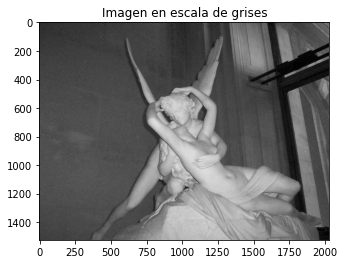

In [4]:
plt.imshow(img, cmap='gray')
plt.title('Imagen en escala de grises')
plt.show()

Aplicando descomposición de valores singulares (SVD) a la imagen

In [14]:
U, S, V_T = np.linalg.svd(img, full_matrices=False)

In [13]:
print('U (shape): ', U.shape)
print('S (shape): ', S.shape)
print('V_T (shape): ', V_T.shape)

U (shape):  (1524, 1524)
S (shape):  (1524,)
V_T (shape):  (2032, 2032)


Function to limit the use of vectors and singular values and print the resulting image

In [46]:
def image_with_truncated_SVD(U, S, V_T, n):
    """
    Function to limit the use of vectors and singular values and print the resulting image
        args:
            U (np array): left singular vectors
            S (np array): singular values
            V_T (np array): right singular vectors (transposed)
            n (integer): number of vectors and singular values that will be used
        returns:
            -
    """
    
    
    ## Truncated image SVD
    img_svd_n = 0
    for i in range(1, (n + 1)):
        img_svd_n += np.outer((U[:, i]*S[i]), V_T[i, :])
    
    
    ## Printing resulting image
    plt.imshow(img_svd_n, cmap='gray')
    title = 'Truncated SVD to value of {}'.format(n)
    plt.title(title)
    plt.show()

Resulting image truncating SVD to value of **10**

In [30]:
n = 10

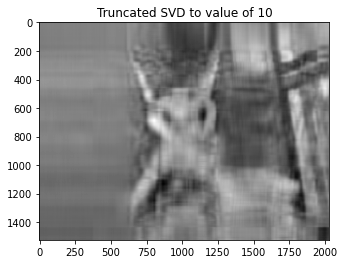

In [31]:
image_with_truncated_SVD(U, S, V_T, n)

Resulting image truncating SVD to value of **10**

In [32]:
n = 20

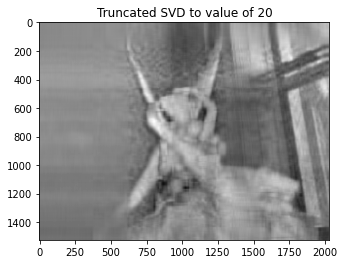

In [33]:
image_with_truncated_SVD(U, S, V_T, n)

Resulting image truncating SVD to value of **30**

In [36]:
n = 30

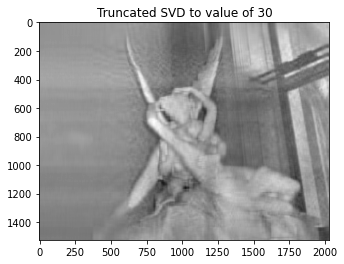

In [37]:
image_with_truncated_SVD(U, S, V_T, n)

Resulting image truncating SVD to value of **40**

In [38]:
n = 40

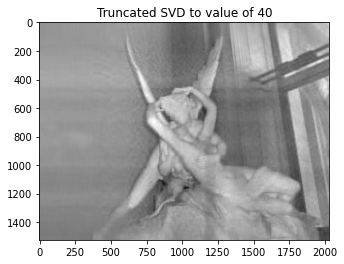

In [39]:
image_with_truncated_SVD(U, S, V_T, n)

Resulting image truncating SVD to value of **50**

In [40]:
n = 50

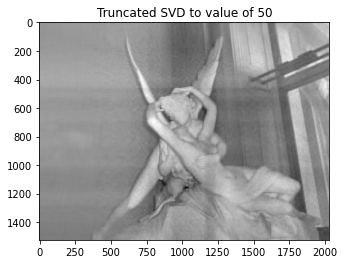

In [41]:
image_with_truncated_SVD(U, S, V_T, n)

#### Ejercicio tarea 2:

**Con una imagen de su elección (puede ser la misma que del ejercicio1) definir un número de vectores singulares izquierdos, derechos y valores singulares de modo que se aprecie la imagen "bien".**

In [73]:
min_n_value = 28

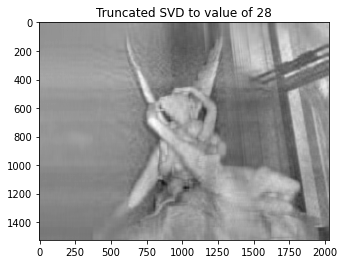

In [74]:
image_with_truncated_SVD(U, S, V_T, min_n_value)

In [75]:
result = "Therefore, the minimum value that can be used to truncate the SVD's is {}".format(min_n_value)
print(result)

Therefore, the minimum value that can be used to truncate the SVD's is 28


---
---